In [ ]:
Topic:        Challenge Set 2
Subject:      Pandas movies
Date:         10/06/2019
Name:         Julien Ruvira
Worked with:  Zoey

In [152]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [27]:
df = pd.read_csv('./challenges_data/2013_movies.csv')

In [28]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [29]:
df.loc[(df['Title'] == 'Cloudy with a Chance of Meatballs 2'), 'Director'] = 'Cody Cameron'
df.loc[(df['Title'] == 'Jurassic Park 3D'), 'Director'] = 'Steven Spielberg'
df.loc[(df['Title'] == 'Instructions Not Included'), 'Director'] = 'Eugenio Derbez'
df.loc[(df['Title'] == 'Kevin Hart: Let Me Explain'), 'Director'] = 'Leslie Small'

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                100 non-null float64
DomesticTotalGross    100 non-null int64
Director              100 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [32]:
df = df.fillna(0)

In [8]:
# df.set_index(df['ReleaseDate'], inplace=True)

In [39]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [38]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

**Challenge 1**

Plot domestic total gross over time.

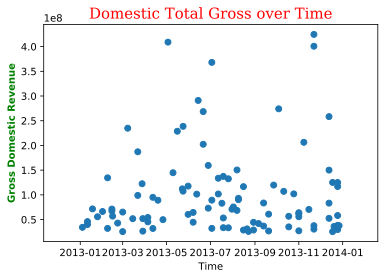

In [48]:
plt.scatter(df['ReleaseDate'],df['DomesticTotalGross']);

#title:
plt.title('Domestic Total Gross over Time', family='serif',fontsize = 15,loc='center',color='r');
#plt.title('Bold Italic Title',fontsize = 40,style='italic',weight='bold',rotation=10,color='purple');


# X and Y axis
plt.xlabel('Time')
plt.ylabel('Gross Domestic Revenue',fontsize = 10, weight = 'bold',color='green');

**Challenge 2**

Plot runtime vs. domestic total gross.

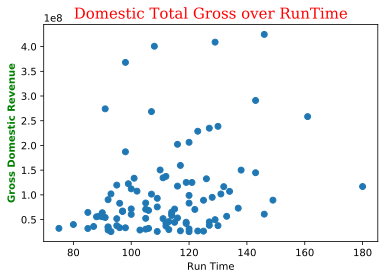

In [51]:
plt.scatter(df['Runtime'],df['DomesticTotalGross']);

#title:
plt.title('Domestic Total Gross over RunTime', family='serif',fontsize = 15,loc='center',color='r');
#plt.title('Bold Italic Title',fontsize = 40,style='italic',weight='bold',rotation=10,color='purple');


# X and Y axis
plt.xlabel('Run Time')
plt.ylabel('Gross Domestic Revenue',fontsize = 10, weight = 'bold',color='green');

**Challenge 3**

Group your data by Rating and
find the average runtime and domestic total gross at each level of Rating.

In [86]:
rating_df = df.copy()

In [79]:
rating_df = rating_df.groupby('Rating').mean()

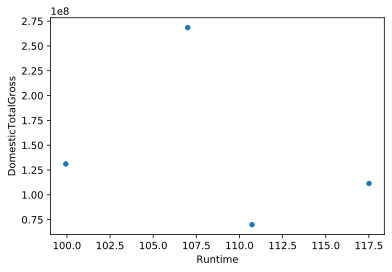

In [81]:
rating_df.plot(x='Runtime', y='DomesticTotalGross', kind='scatter')

**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, 

and in each plot the release date vs the domestic total gross.

In [89]:
mpaa_df = df.copy()

In [91]:
mpaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                100 non-null float64
DomesticTotalGross    100 non-null int64
Director              100 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [90]:
mpaa_df['Rating'].unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

/Users/ruviraj/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 735040.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


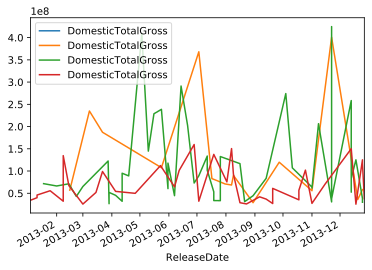

In [96]:
fig, ax = plt.subplots()
mpaa_df.groupby('Rating').plot(x='ReleaseDate', y='DomesticTotalGross', ax=ax, legend=True);

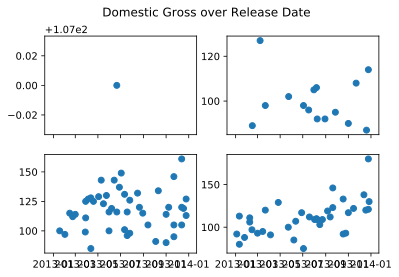

In [114]:
fig, axs = plt.subplots(2,2, sharex=True)
fig.suptitle('Domestic Gross over Release Date')
axs[0,0].scatter(mpaa_df[mpaa_df['Rating'] == 'G']['ReleaseDate'], mpaa_df[mpaa_df['Rating'] == 'G']['Runtime']);
axs[0,1].scatter(mpaa_df[mpaa_df['Rating'] == 'PG']['ReleaseDate'], mpaa_df[mpaa_df['Rating'] == 'PG']['Runtime']);
axs[1,0].scatter(mpaa_df[mpaa_df['Rating'] == 'PG-13']['ReleaseDate'], mpaa_df[mpaa_df['Rating'] == 'PG-13']['Runtime']);
axs[1,1].scatter(mpaa_df[mpaa_df['Rating'] == 'R']['ReleaseDate'], mpaa_df[mpaa_df['Rating'] == 'R']['Runtime']);


**Challenge 5**
What director in your dataset has the highest gross per movie?

In [115]:
director_df = df.copy()

In [118]:
director_df['DomesticTotalGross'].sort_values(ascending=False).head()

0    424668047
1    409013994
2    400738009
3    368061265
4    291045518
Name: DomesticTotalGross, dtype: int64

In [122]:
director_df.loc[0]['Director']

'Francis Lawrence'

**Challenge 6**
Bin your dataset into months and make a bar graph of the mean domestic total gross by month. 

Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013
Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [238]:
bins_df = df.copy()

In [239]:
bins_df['Month'] = pd.DatetimeIndex(df['ReleaseDate']).month


In [240]:
bins_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6


In [241]:
#bins_df['DomesticTotalGross'].sem(axis = 0) 


In [242]:
sem_bins_df = bins_df[['Month','DomesticTotalGross']]


sem_bins_df.groupby('Month').sem()

,DomesticTotalGross
Month,
1,6.555914e+06
2,1.240927e+07
3,2.441314e+07
4,1.032911e+07
5,3.951859e+07
6,3.365826e+07
7,2.638732e+07
8,1.245915e+07
9,1.421654e+07


In [243]:
## grouby
bins_df = bins_df.groupby('Month').mean()

In [245]:
bins_df['sem_num'] = sem_bins_df.groupby('Month').sem()

In [249]:
bins_df.head()

,Budget,DomesticTotalGross,Runtime,sem_num
Month,,,,
1,2.550000e+07,4.954324e+07,94.600000,6.555914e+06
2,3.285714e+07,6.738601e+07,103.857143,1.240927e+07
3,9.011111e+07,9.609710e+07,109.111111,2.441314e+07
4,3.883333e+07,6.094072e+07,114.166667,1.032911e+07
5,1.328750e+08,1.774097e+08,117.875000,3.951859e+07


In [250]:
bins_df = bins_df.reset_index()

<BarContainer object of 12 artists>

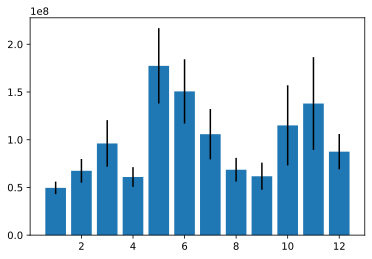

In [251]:
plt.bar(bins_df['Month'], bins_df['DomesticTotalGross'], yerr=bins_df['sem_num'])